# Extinction curve measured at UH88.

2022-06-24

Extinction curve measured at UH88.

http://1601-031.a.hiroshima-u.ac.jp/lips/lipsccd/rep/rep0203eff.html

In [1]:
import numpy as np
from astropy.table import Table

In [2]:
ext_tbl = Table.read('abs_lambda_b.xy', format='ascii', names=('order', 'wavelength', 'mag_per_airmass', 'unknown'))

In [3]:
ext_tbl

<Table length=10>
order wavelength mag_per_airmass unknown
int64   int64        float64     float64
----- ---------- --------------- -------
   33       5880        0.254247 5.29258
   32       6063        0.209814 5.28841
   31       6259        0.212705  5.2828
   30       6468         0.18419 5.25456
   29       6690        0.141728 5.21652
   28       6929        0.155883 5.14085
   27       7186        0.138325 5.05156
   25       7761       0.0851779 4.71469
   24       8084       0.0559913 4.48396
   23       8436       0.0191063 4.20282

In [4]:
ext_tbl['ratio'] = 10**(ext_tbl['mag_per_airmass']/(-2.5)) 

In [5]:
ext_tbl

<Table length=10>
order wavelength mag_per_airmass unknown       ratio       
int64   int64        float64     float64      float64      
----- ---------- --------------- ------- ------------------
   33       5880        0.254247 5.29258  0.791227184372796
   32       6063        0.209814 5.28841 0.8242793121285423
   31       6259        0.212705  5.2828 0.8220874153417842
   30       6468         0.18419 5.25456 0.8439641519244171
   29       6690        0.141728 5.21652 0.8776246240437677
   28       6929        0.155883 5.14085 0.8662570856573298
   27       7186        0.138325 5.05156 0.8803796595917592
   25       7761       0.0851779 4.71469 0.9245466727466589
   24       8084       0.0559913 4.48396  0.949737267572976
   23       8436       0.0191063 4.20282 0.9825563800356716

LOWTRAN7 model.

In [6]:
import lowtran

In [7]:
model_names = {
    2: 'Midlatitude Summer',
    3: 'Midlatitude Winter',
    4: 'Subarctic Summer',
    5: 'Subarctic Winter',
    6: '1976 US Standard',
}

In [8]:
ALTITUDE_UH88 = 4.250  # km.
L1 = 300.0  # Wavelength range 1.
L2 = 1000.0  # Wavelength range 2.
DL = 10.0  # Wavelength step.

In [9]:
# Model parameters to be used in lowtran.transmittance().
params_lowtran = {
    'model': 3,  # Midlatitude winter.
    'h1': ALTITUDE_UH88,  # Altitude of the site. [km] 
    'angle': 0.0,  # Zentih angle. [deg]
    'wlshort': L1,  # Shortest wavelength. [nm]
    'wllong': L2,  # Longest wavelength. [nm]
    'wlstep': DL,  # Wavelength step. [nm]
}

In [10]:
tr = lowtran.transmittance(params_lowtran)

In [11]:
wls = tr['wavelength_nm'].to_numpy()
trs = tr['transmission'].to_numpy()[0].T[0]

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

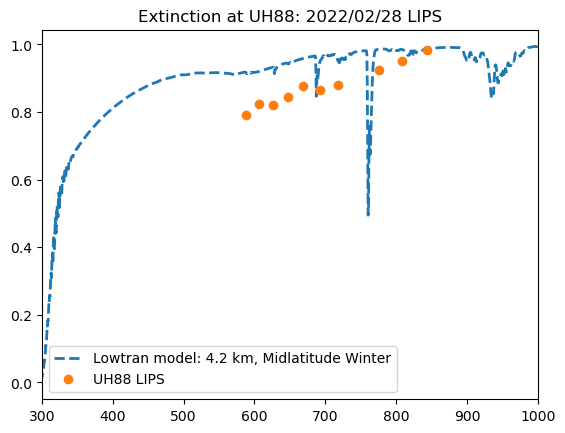

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim([300,1000])
ax1.set_title('Extinction at UH88: 2022/02/28 LIPS')
ax1.plot(wls, trs, lw=2, linestyle='--', 
         label='Lowtran model: {:.2} km, {}'.format(
             params_lowtran['h1'], 
            model_names[params_lowtran['model']])
        )
ax1.plot(ext_tbl['wavelength']/10.0, ext_tbl['ratio'], 
         marker='o', lw=0, label='UH88 LIPS')
ax1.legend()

## Discussion.

  * 大気減光のUH88実測値は、やや過剰見積もりになっている。
    * たまたま減光が多い空だった？
    * 解析の不備があった？(2002年の計算のため再確認難)